## Import the necessary Packages.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, plot_roc_curve, classification_report,roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:
from google.colab import files
uploaded = files.upload()

import io
df= pd.read_csv(io.BytesIO(uploaded ['Airline Passenger Satisfaction.csv']))

Saving Airline Passenger Satisfaction.csv to Airline Passenger Satisfaction.csv


## Load the csv file into a dataframe

In [9]:
df=pd.read_csv('Airline Passenger Satisfaction.csv')

In [10]:
df.shape

(25976, 25)

## Some Preprocessing
Convert text values into numerical format. For example, in gender, male is denoted as 1 and female as 2

In [11]:
df.loc[df["satisfaction"] == "satisfied", "satisfaction"] = 1
df.loc[df["satisfaction"] == "neutral or dissatisfied", "satisfaction"] = 0
df.loc[df["Gender"] == "Male", "Gender"] = 1
df.loc[df["Gender"] == "Female", "Gender"] = 0
df.loc[df["Customer Type"] == "Loyal Customer", "Customer Type"] = 1
df.loc[df["Customer Type"] == "disloyal Customer", "Customer Type"] = 0
df.loc[df["Class"] == "Business", "Class"] = 1
df.loc[df["Class"] == "Eco", "Class"] = 2
df.loc[df["Class"] == "Eco Plus", "Class"] = 3
df.loc[df["Type of Travel"] == "Business travel", "Type of Travel"] = 1
df.loc[df["Type of Travel"] == "Personal Travel", "Type of Travel"] = 0

## Target Variable

In [12]:
df['satisfaction']

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25976, dtype: object

## 1. Load the target variable into Y and the dependent variables into X

In [99]:
X=df[['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
Y=df['satisfaction']

## 2. Target Variable Distribution

0    14573
1    11403
Name: satisfaction, dtype: int64

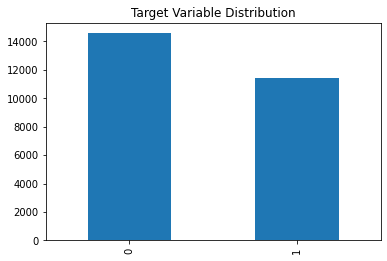

In [67]:
fig=df['satisfaction'].value_counts().plot(kind='bar').set_title('Target Variable Distribution')
fig.axes.xaxis.set_label('Values')
fig.axes.yaxis.set_label('Outcomes')
df['satisfaction'].value_counts()

## 3. Assess if there are any Missing Values
The number of Non null values is not equal to total number of values for the variable Arrival Delay in Minutes and hence, there is an indication of missing values . Also, from the heatmap this variable has missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

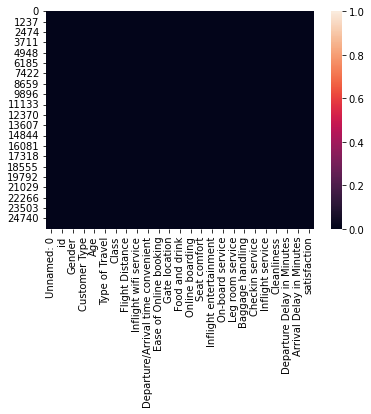

In [13]:
df.info()
sns.heatmap(df.isnull(), cbar=True)

## Handling Missing Values
Fill the missing values in a column with the mean of the column.

In [14]:
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  int64  
 3   Customer Type                      25976 non-null  int64  
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  int64  
 6   Class                              25976 non-null  int64  
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

## 4. Explore the information value and distribution of features using the pairplot
It takes quite a long time to generate the pairplot. So we are seeing the pairplot for a subset of features here

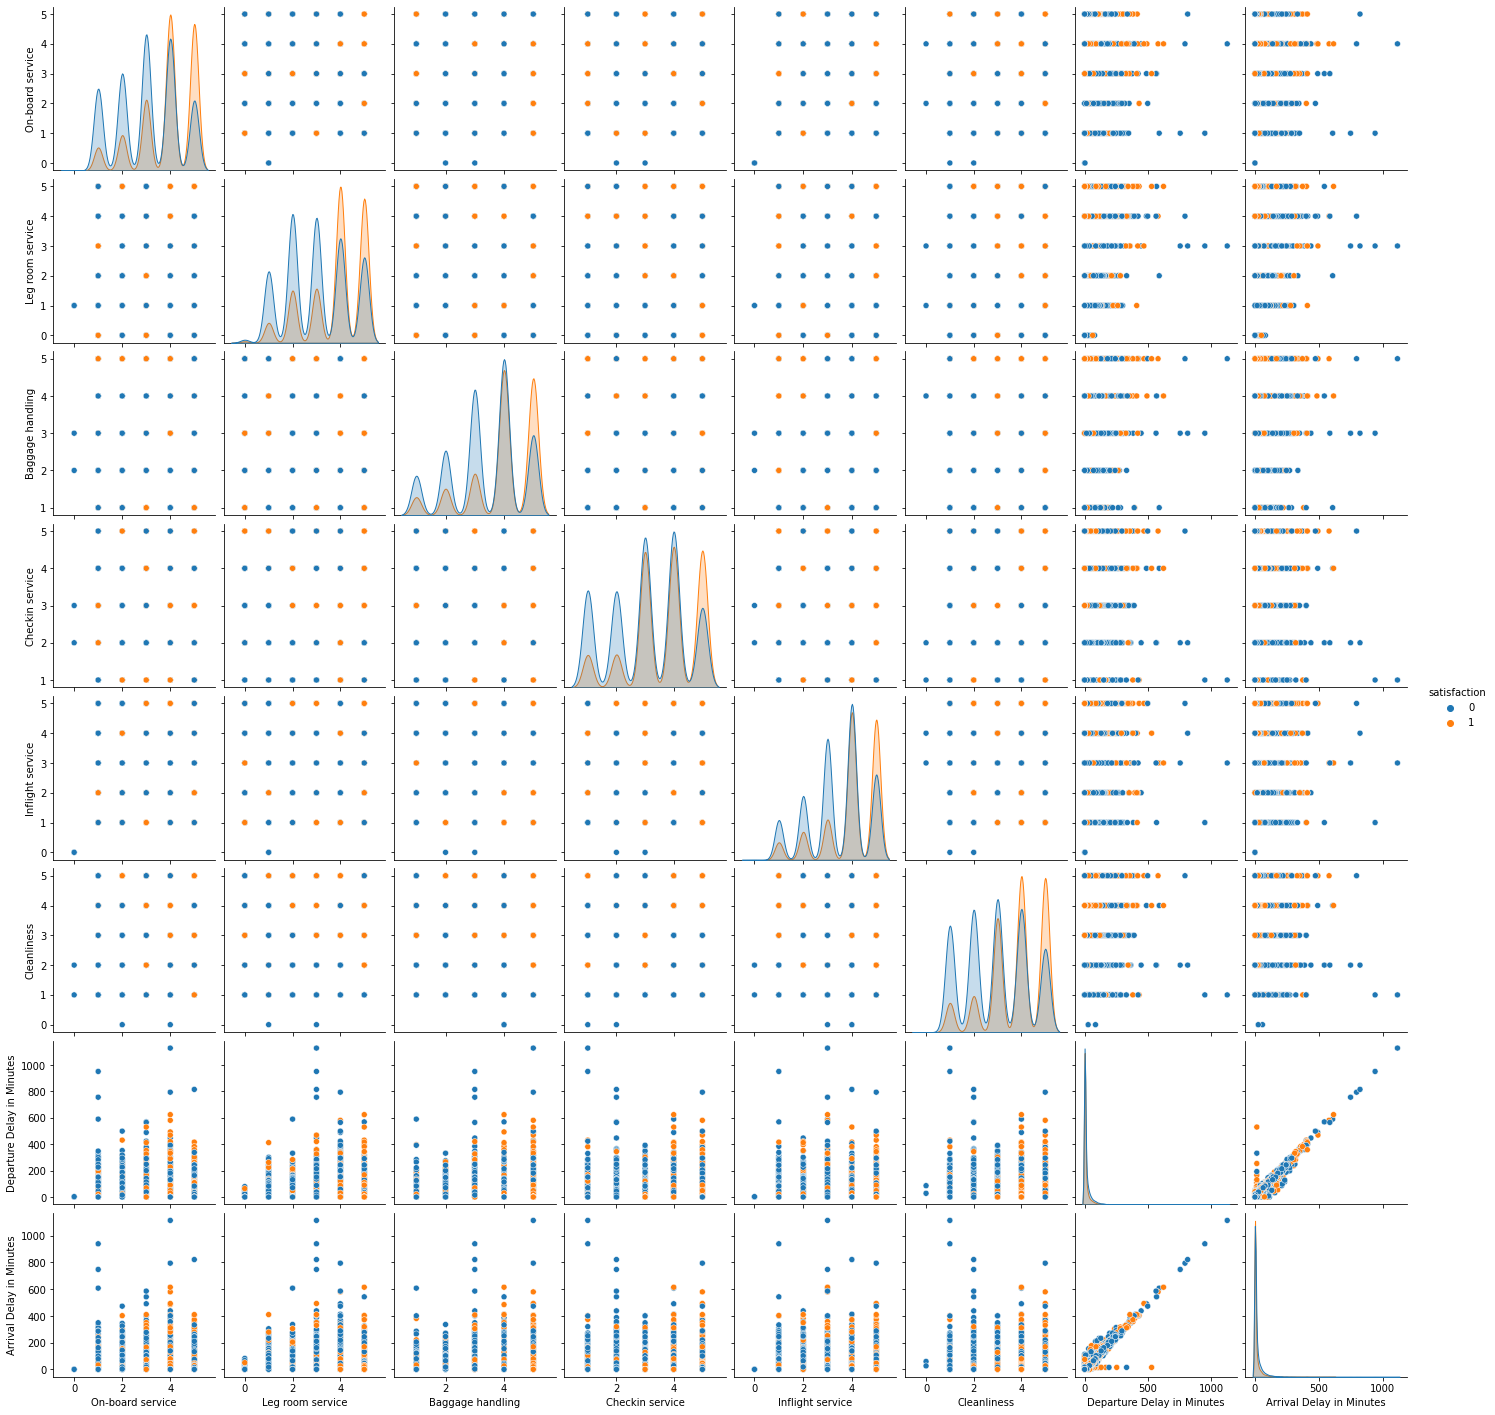

In [ ]:
sns.pairplot(df[['On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction']], hue='satisfaction')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  int64  
 3   Customer Type                      25976 non-null  int64  
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  int64  
 6   Class                              25976 non-null  int64  
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

0    13172
1    12804
Name: Gender, dtype: int64

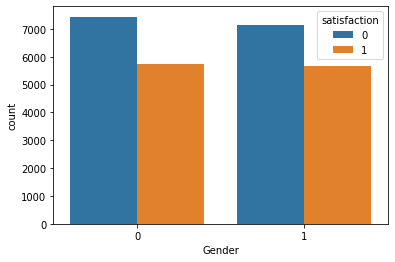

In [127]:
sns.countplot(data=df, x='Gender', hue="satisfaction")
df['Gender'].value_counts()

39    723
25    713
40    635
41    633
43    626
     ... 
75     15
74     14
78     11
79     10
85      8
Name: Age, Length: 75, dtype: int64

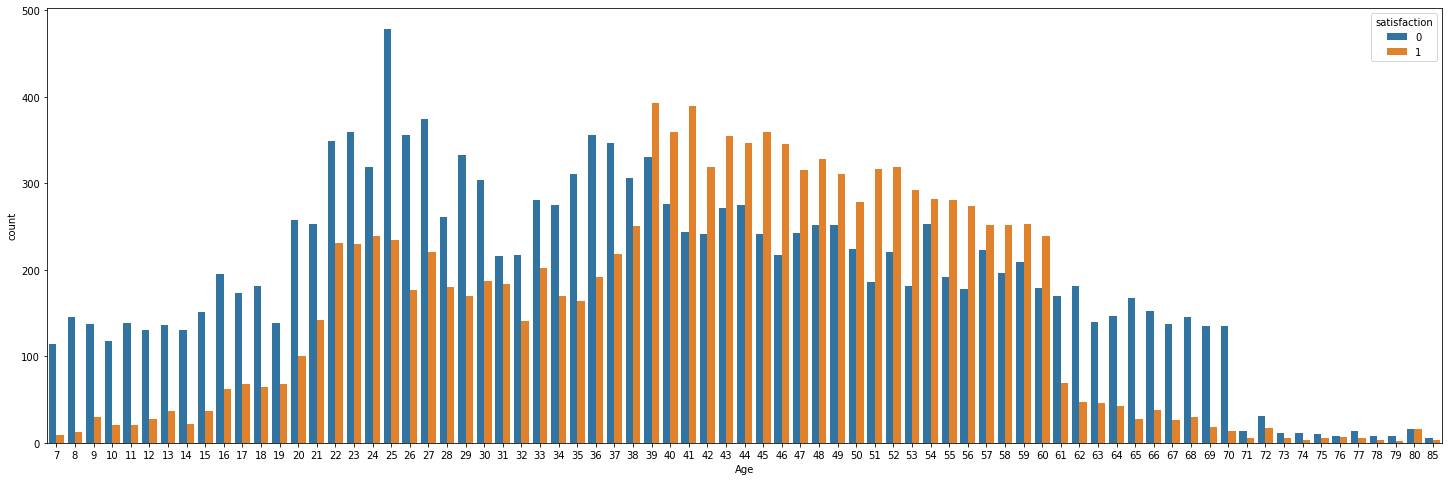

In [136]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.countplot(data=df, x='Age', hue="satisfaction")
df['Age'].value_counts()

4    7706
3    5313
5    5307
2    4429
1    2569
0     652
Name: Online boarding, dtype: int64

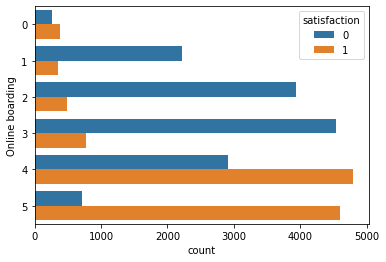

In [139]:
sns.countplot(data=df, y="Online boarding", hue="satisfaction")
df['Online boarding'].value_counts()


1    18038
0     7938
Name: Type of Travel, dtype: int64

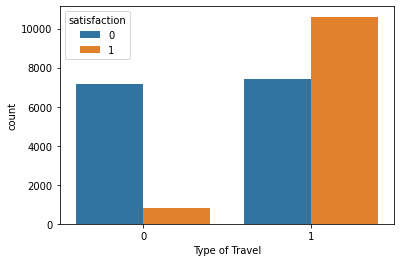

In [117]:
sns.countplot(data=df, x='Type of Travel', hue="satisfaction")
df['Type of Travel'].value_counts()

4    7368
5    6331
3    4745
2    4331
1    3197
0       4
Name: Inflight entertainment, dtype: int64

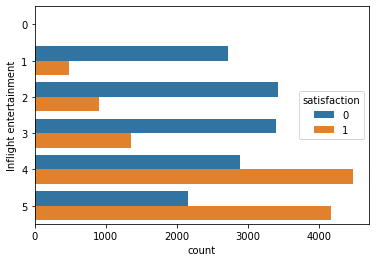

In [124]:
sns.countplot(data=df, y='Inflight entertainment', hue="satisfaction")
df['Inflight entertainment'].value_counts()

4    7991
5    6688
3    4632
2    3632
1    3033
Name: Seat comfort, dtype: int64

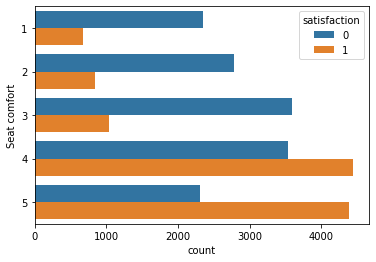

In [125]:
sns.countplot(data=df, y='Seat comfort', hue="satisfaction")
df['Seat comfort'].value_counts()

4    7836
5    5844
3    5709
2    3670
1    2915
0       2
Name: On-board service, dtype: int64

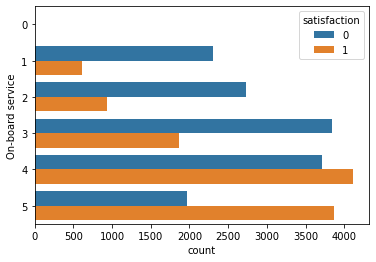

In [126]:
sns.countplot(data=df, y='On-board service', hue="satisfaction")
df['On-board service'].value_counts()

4    6790
3    6065
5    5727
2    3981
1    3411
0       2
Name: Cleanliness, dtype: int64

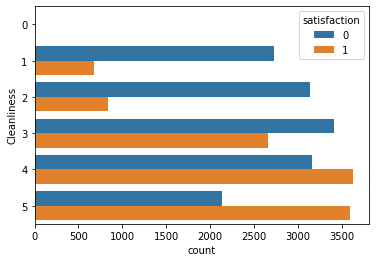

In [137]:
sns.countplot(data=df, y='Cleanliness', hue="satisfaction")
df['Cleanliness'].value_counts()

4    7991
5    6688
3    4632
2    3632
1    3033
Name: Seat comfort, dtype: int64

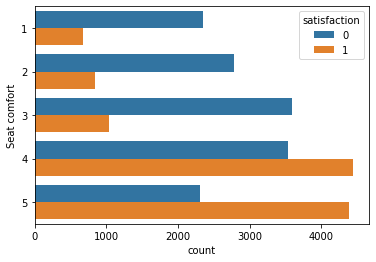

In [141]:
sns.countplot(data=df, y='Seat comfort', hue="satisfaction")
df['Seat comfort'].value_counts()

1    21177
0     4799
Name: Customer Type, dtype: int64

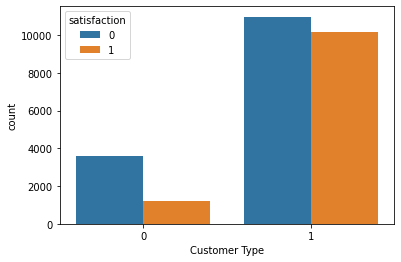

In [16]:
sns.countplot(data=df, x='Customer Type', hue="satisfaction")
df['Customer Type'].value_counts()

## 5(a) Logistic Regression
1. Check for correlation between the independent variables and target variable.
2. <font color="red">Remove outliers</font> since logistic regression is sensitive to outliers

## Find Correlations

In [34]:
df.corr()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Unnamed: 0,1.000000,0.006946,-0.005389,-0.003877,-0.007964,-0.001755,0.000578,-0.002470,-0.003085,-0.003962,...,-0.012927,0.001180,-0.004194,0.000349,0.002773,-0.008069,-0.005058,-0.005948,-0.002970,0.001511
id,0.006946,1.000000,-0.004371,-0.006700,0.010211,0.006564,-0.105987,0.095335,-0.030303,-0.002502,...,-0.001078,0.056544,0.041921,0.073085,0.079521,0.076587,0.020411,-0.009884,-0.029039,0.010965
Gender,-0.005389,-0.004371,1.000000,0.027878,0.009261,-0.019930,-0.006411,-0.005222,-0.006323,0.008417,...,-0.005217,-0.000423,0.028051,0.032202,0.000079,0.034890,-0.011605,0.005775,0.005080,0.007335
Customer Type,-0.003877,-0.006700,0.027878,1.000000,0.294210,-0.307827,-0.044415,0.229306,-0.001333,0.206864,...,0.090418,0.044628,0.042757,-0.025470,0.027565,-0.025729,0.072150,-0.003200,-0.004701,0.179632
Age,-0.007964,0.010211,0.009261,0.294210,1.000000,0.029773,-0.115125,0.099409,0.009242,0.032449,...,0.068998,0.054977,0.033299,-0.049863,0.025388,-0.059083,0.048418,-0.004334,-0.007387,0.121697
Type of Travel,-0.001755,0.006564,-0.019930,-0.307827,0.029773,1.000000,-0.485258,0.264559,0.109021,-0.246425,...,0.171904,0.072902,0.142869,0.039824,-0.014292,0.027235,0.106232,0.008003,0.006520,0.453268
Class,0.000578,-0.105987,-0.006411,-0.044415,-0.115125,-0.485258,1.000000,-0.425756,-0.032293,0.076170,...,-0.199558,-0.222258,-0.204803,-0.176942,-0.158999,-0.161973,-0.144021,0.006455,0.011923,-0.443715
Flight Distance,-0.002470,0.095335,-0.005222,0.229306,0.099409,0.264559,-0.425756,1.000000,0.005007,-0.014401,...,0.137538,0.117880,0.136995,0.071549,0.075720,0.066355,0.105578,0.003446,0.000130,0.295292
Inflight wifi service,-0.003085,-0.030303,-0.006323,-0.001333,0.009242,0.109021,-0.032293,0.005007,1.000000,0.349137,...,0.201782,0.113658,0.159699,0.118199,0.046046,0.108419,0.125768,-0.010078,-0.012251,0.280395
Departure/Arrival time convenient,-0.003962,-0.002502,0.008417,0.206864,0.032449,-0.246425,0.076170,-0.014401,0.349137,1.000000,...,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.000238,-0.001343,-0.064798


In [70]:
#Checking correlation

corr_matrix = df.corr()
print(corr_matrix["satisfaction"].sort_values(ascending=False))

satisfaction                         1.000000
Online boarding                      0.494526
Type of Travel                       0.453268
Inflight entertainment               0.398951
Seat comfort                         0.346275
On-board service                     0.321491
Cleanliness                          0.314350
Leg room service                     0.309629
Flight Distance                      0.295292
Inflight wifi service                0.280395
Baggage handling                     0.252415
Inflight service                     0.245573
Checkin service                      0.241495
Food and drink                       0.216868
Customer Type                        0.179632
Ease of Online booking               0.157709
Age                                  0.121697
id                                   0.010965
Gender                               0.007335
Unnamed: 0                           0.001511
Gate location                       -0.016627
Departure Delay in Minutes        

## Since tree based models do not require outlier removal, the data is copied into another dataframe and outliers are removed from df

In [72]:
df_tree=df.copy(deep=True)

## Detect Outliers
Find outliers which are values not falling within the normal acceptable range for a variable

In [71]:
df_stat = df.describe()
accept_range = {}
for col_name in df.columns:
  accept_range[col_name] = {'low_limit':df_stat.at['25%',col_name] - 1.5* (df_stat.at['75%',col_name] - df_stat.at['25%',col_name]), 'high_limit': df_stat.at['75%',col_name] + 1.5* (df_stat.at['75%',col_name] - df_stat.at['25%',col_name])}

print (accept_range)

{'Unnamed: 0': {'low_limit': -12987.5, 'high_limit': 38962.5}, 'id': {'low_limit': -65950.125, 'high_limit': 195704.875}, 'Gender': {'low_limit': -1.5, 'high_limit': 2.5}, 'Customer Type': {'low_limit': 1.0, 'high_limit': 1.0}, 'Age': {'low_limit': -9.0, 'high_limit': 87.0}, 'Type of Travel': {'low_limit': -1.5, 'high_limit': 2.5}, 'Class': {'low_limit': -0.5, 'high_limit': 3.5}, 'Flight Distance': {'low_limit': -1581.0, 'high_limit': 3739.0}, 'Inflight wifi service': {'low_limit': -1.0, 'high_limit': 7.0}, 'Departure/Arrival time convenient': {'low_limit': -1.0, 'high_limit': 7.0}, 'Ease of Online booking': {'low_limit': -1.0, 'high_limit': 7.0}, 'Gate location': {'low_limit': -1.0, 'high_limit': 7.0}, 'Food and drink': {'low_limit': -1.0, 'high_limit': 7.0}, 'Online boarding': {'low_limit': -1.0, 'high_limit': 7.0}, 'Seat comfort': {'low_limit': -2.5, 'high_limit': 9.5}, 'Inflight entertainment': {'low_limit': -1.0, 'high_limit': 7.0}, 'On-board service': {'low_limit': -1.0, 'high_li

## Filter  the outliers 
Remove the outliers from the data.

In [73]:
df_tree=df.copy(deep=True)
# Filter the outliers
for col_name in df.columns:
  df.drop(df[df[col_name] > accept_range[col_name]['high_limit']].index, inplace=True)
  df.drop(df[df[col_name] < accept_range[col_name]['low_limit']].index, inplace=True)

## After removal of outliers
The number of entries has decreased from 25000 to 15000+ after removing outliers

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15234 entries, 1 to 25974
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         15234 non-null  int64  
 1   id                                 15234 non-null  int64  
 2   Gender                             15234 non-null  int64  
 3   Customer Type                      15234 non-null  int64  
 4   Age                                15234 non-null  int64  
 5   Type of Travel                     15234 non-null  int64  
 6   Class                              15234 non-null  int64  
 7   Flight Distance                    15234 non-null  int64  
 8   Inflight wifi service              15234 non-null  int64  
 9   Departure/Arrival time convenient  15234 non-null  int64  
 10  Ease of Online booking             15234 non-null  int64  
 11  Gate location                      15234 non-null  int

## This function is used to train a model, test it and evaluate the model. 

In [ ]:
def train_and_eval(model, X_train, X_test, y_train, y_test, name):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  # Accuracy
  print(f"Accuracy = {accuracy_score(y_pred, y_test)}")
  print(f"Precision = {precision_score(y_pred, y_test.values)}")
  print(f"Recall = {recall_score(y_pred, y_test.values)}")
  print(f"F1-Score ={f1_score(y_pred,y_test.values)}")
  roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='Area = %0.2f' % roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig("ROC"+name +".png")
  plt.show()
  return fpr, tpr, roc_auc

In [ ]:
X=df[['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
Y=df['satisfaction']

## Logistic Regression Results
Outlier removed data is used for training and testing the logistic regression model. The accuracy, precision, recall, f1-score and AUC are displayed

Logistic Regression Results:
Accuracy = 0.8823143285821455
Precision = 0.8816621499548328
Recall = 0.8905109489051095
F1-Score =0.8860644575578756


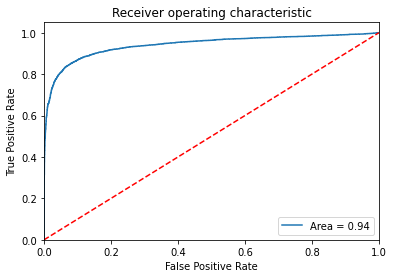

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=101)
log_model = LogisticRegression(solver='liblinear')
print("Logistic Regression Results:")
log_fpr, log_tpr,log_auc = train_and_eval(log_model,X_train, X_test, y_train, y_test,"LogisticRegression")

## kNN
kNN is sometimes sensitive to outliers. So we start with the data in which outliers are removed. It requires data to be normalised. Hence, we use min max scaling and then use the rescaled data.

In [ ]:
scaler = MinMaxScaler()
# fit data into minmax scaler
X_=scaler.fit_transform(X)
# scaled data
X_Scaled=pd.DataFrame(X_ ,columns=X.columns)

## Run with k=5 initially

Accuracy = 0.9128844711177795
Precision = 0.8888888888888888
Recall = 0.9400076423385556
F1-Score =0.913733865725694


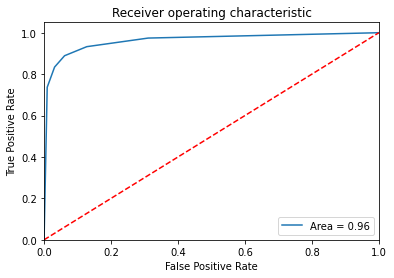

(array([0.        , 0.00935855, 0.03139013, 0.06122051, 0.12751024,
        0.3109768 , 1.        ]),
 array([0.        , 0.73658537, 0.83414634, 0.88888889, 0.93261066,
        0.97416441, 1.        ]),
 0.9618595608195635)

In [ ]:
# split into train-test set
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, Y, test_size=0.7, random_state=101)
# k=5
knn_model=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
train_and_eval(knn_model,X_train, X_test, y_train, y_test,"knn")

## Find the optimal number of k

In [ ]:
from sklearn.model_selection import cross_val_score
max_k=80
cv_score=[]
cv_score_val=0
optimal_k=5
# find the cv_scores for different values of k and store them
for i in range(1, max_k):
  knn=KNeighborsClassifier(n_neighbors=i, metric='euclidean')
  scores=cross_val_score(knn, X_train, y_train, cv=10, scoring='roc_auc')
  cv_score.append(scores.mean())
  if scores.mean()>cv_score_val:
    cv_score_val=scores.mean()
    # find k with best roc auc
    optimal_k=i
print("The optimal number of clusters is", optimal_k)

The optimal number of clusters is 21


## Run kNN with the optimal k

Accuracy = 0.9071642910727682
Precision = 0.8803974706413731
Recall = 0.9369352047683138
F1-Score =0.9077868852459017


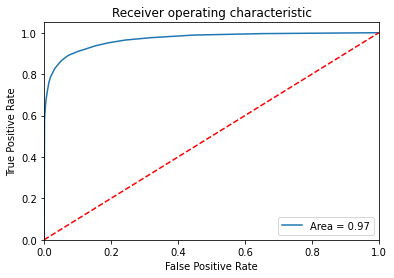

In [ ]:
# split into train-test set
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, Y, test_size=0.7, random_state=101)
# k=5
knn_model=KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn_fpr,knn_tpr,knn_auc=train_and_eval(knn_model,X_train, X_test, y_train, y_test, "knn")

## 5(c) Decision Tree Classifier
Tree based models are not sensitive to outliers. Hence we run the Decision Tree classifier with the entire data

In [ ]:
X=df_tree[['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
Y=df_tree['satisfaction']
df_tree=pd.get_dummies(df_tree)

Accuracy = 0.9399461054792763
Precision = 0.9303834808259587
Recall = 0.9314825753101004
F1-Score =0.9309327036599764


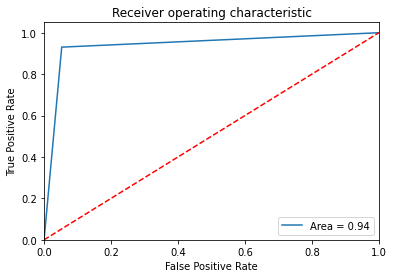

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
dt_model = DecisionTreeClassifier()
dt_fpr,dt_tpr, dt_auc=train_and_eval(dt_model,X_train, X_test, y_train, y_test,"dtree")

## 5 (d) RandomForest Classifier
Similar to Decision tree, Random Forest also doesn't require removal of outliers.

Accuracy = 0.9563711022712691
Precision = 0.9374631268436578
Recall = 0.9612825166364186
F1-Score =0.9492234169653525


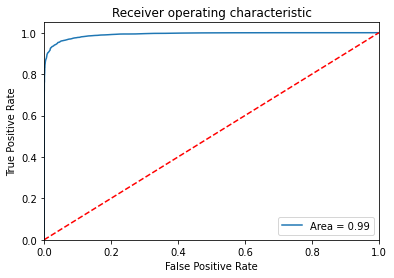

In [ ]:
X=df_tree[['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
Y=df_tree['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
rf_model  = RandomForestClassifier()
rf_fpr,rf_tpr,rf_auc=train_and_eval(rf_model,X_train, X_test, y_train, y_test, "Random Forest" )

## Random Forest with RandomizedSearchCV
This is used to find random combinations of the hyperparameters used in random forest model to find the best solution for the built model. Its number of trees is varied(50,70,100,150), maximum depth of the tree is varied and so on for each run and the best configuration is chosen.

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
import random
# Number of trees in random forest
n_estimators = [50,70,100,150]
# Maximum number of levels in tree
max_depth = [6,9]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,  4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


## Searching for optimal Random Forest tree
This takes a few minutes

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Accuracy = 0.958680867445143
Precision = 0.940117994100295
Recall = 0.9640048396854205
F1-Score =0.9519115890083631


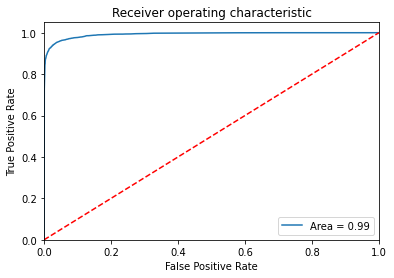

In [ ]:
bestrf_fpr, bestrf_tpr, bestrf_auc=train_and_eval(rf_random,X_train, X_test, y_train, y_test, "Randomized  Search with Random Forest" )

## 5(e) AdaBoost
AdaBoost is an ensembling technique and sensitive to outliers. So we utilize the data with outlier already removed

Accuracy = 0.9374316342157077
Precision = 0.9450596252129472
Recall = 0.9339225589225589
F1-Score =0.9394580863674852


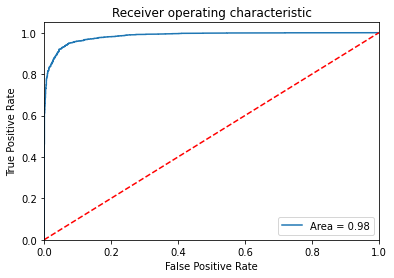

In [ ]:
X=df[['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
Y=df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
ada_model = AdaBoostClassifier(n_estimators=100)
ad_fpr, ad_tpr, ad_auc=train_and_eval(ada_model,X_train, X_test, y_train, y_test, "AdaBoost" )

# 6. Best suited model for Airline Passenger Satisfaction
It can be observed that <font color="red">Random Forest with Randomized Search</font> performs better than Linear Regression, kNN, Decision Tree and AdaBoost in terms of Precision,Recall, F1-Score and AUC. \
Also, the <font color="green">AUC is close to 1</font>, indicating that it is towards a perfect model. The <font color="green">high precision</font> indicates that when the model predicts that a passenger is dissatisfied with the airline, it is more likely to be true. <font color="green">High recall</font> indicates that it is good at identifying all disastisfied customers.Hence, it is the <font color="red">best suited model for Airline Passenger Satisfaction Prediction.</font>

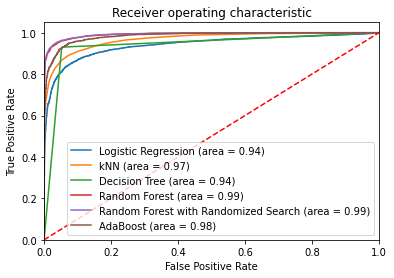

In [ ]:
plt.plot(log_fpr, log_tpr, label='Logistic Regression (area = %0.2f)' % log_auc)
plt.plot(knn_fpr, knn_tpr, label='kNN (area = %0.2f)' % knn_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_auc)
plt.plot(bestrf_fpr, bestrf_tpr, label='Random Forest with Randomized Search (area = %0.2f)' % bestrf_auc)
plt.plot(ad_fpr, ad_tpr, label='AdaBoost (area = %0.2f)' % ad_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

| Metric | Logistic | kNN | Decision Tree | Random Forest | RandomForest with Randomised Search | AdaBoost |
| --- | --- | --- | --- | --- | --- | --- |
| Precision | 0.8817| 0.8804 |0.9304  |0.9372 |0.9422 |0.9450 |
| Recall | 0.8905 |0.9369  |0.9309 |0.9636 |0.9655 |0.9339 |
| F1-Score | 0.8861 |0.9078  |0.9307 | 0.9502 |0.9537 |0.9394 |
| AUC | 0.94 | 0.97 |0.94 |0.99 |<font color= "red">0.99</font> |0.98 |